# Thompson Sampling Algorithm

![alt text](../Images/image-24.png)<br>

# 1. Importing the Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importing the Dataset

In [10]:
data_set = pd.read_csv("Ads_CTR_Optimisation.csv")

❌ Has no Metric of feature and no dependent variable

# 3. Implementing Thompson Sampling Algorithm

In [ ]:
# importing the random Library, because we are going to work with random numbers
import random


# 1. Total number of Users N to whom we show the ads
N : int = 100######## ###########uuggfdfdsaq###00 

# 2. Total number of ads d we used in the process, among which we want to find the best ad with the highest ...
# ... conversion rate. In our dataset each ad has a fixed conversion rate.
d : int = 10

# 3. this variable will store the List of  all the ads that will be selected over the 10000 rounds
ads_selected : list = []                      # We initialize it as an empty list, then store over the round different ads we selected.

######################################################## Step 1 ######################################################################
# 4. Creating an empty list to store the number of times an ad got a reward 1
numbers_of_rewards_1 : list = [0] * d     # We initialize it as a list of 10 zeros elements because no ad got a reward at the beginning
                                          # here is the trick to initialize a list of 10 zeros : [0] * d, d = 10

# 5. Creating an empty list to store the number of times an ad got a reward 0
numbers_of_rewards_0 : list = [0] * d      # We initialize it as a list of 10 zeros elements because no ad got a reward at the beginning
                                           # here is the trick to initialize a list of 10 zeros : [0] * d, d = 10


# 6. total reward
total_reward : int = 0                      # total reward will be initialize at the beginning as 0.


# 7. for loop to iterate through the 10000 rounds
for n in range(0, N):                       # n represent the number of rounds and n goes from 0 to 9999

    # 8. select the ads i.e. Ad that will be selected at the current round
    ad : int = 0

    max_random : float = 0                 # for each of the ads we will compare its upper bound with the max upper bound.
    
 ############################################################ Step 2 ##############################################################################  
    for i in range(0, d):                  # Iterating over the 10 ads
        
        # Index of the current ad  
                            # ⬇️ betavariate() will provide is with the beta distribution
                                          # ⬇️ number of time ad 1 got a reward 1, as argument 
                                                                            # ⬇️ number of time ad 1 got a reward 0, as argument
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

############################################################# Step 3 ##############################################################################
        # Comparing the current ad upper bound with the max upper bound
        if random_beta > max_random:
            max_random = random_beta     # if the random_beta of the current ad is greater than the max_random drawn, we have to update the max_random
            ad = i                       # since the current ad will be selected, we have to update the current ad to i.

        # No need to do an else because if the condition is not true, the last ad with with the max_random drawn will be kept.

    # Adding the selected ad that has the highest random drawn to the selection list
    ads_selected.append(ad)              # append() will add the selected ad to the selection list
    
    # 9. getting the reward of the current ad
    reward : float = data_set.values[n, ad]
    
    # 10. then Checking if the ad got a reward oe not and then updating the reward lists
    if reward == 1:                         # i.e. if the ad got a reward , we need to update the reward lists by incrementing their values by 1
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        
    # 11. updating the total reward by incrementing it by the reward we just got
    total_reward = total_reward + reward


# 4. Visualizing the results

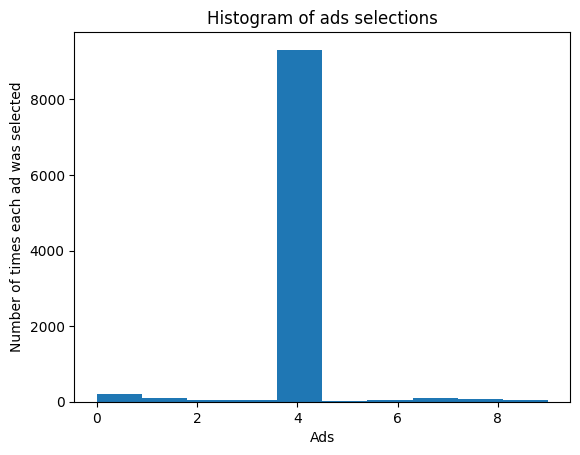

In [12]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()